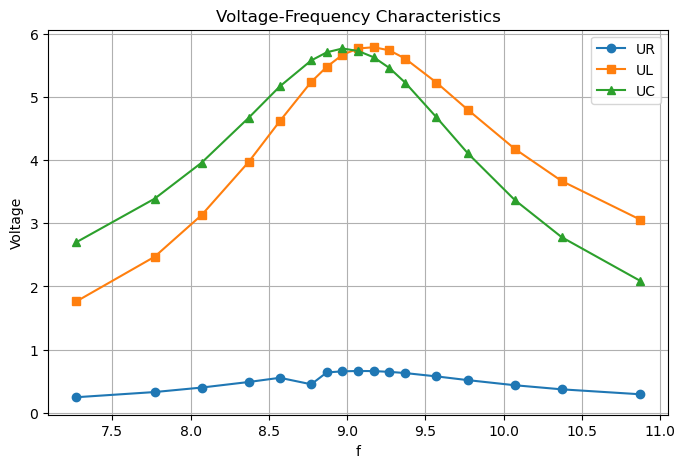

In [2]:
import numpy as np

import matplotlib.pyplot as plt

f = np.array([7.27, 7.77, 8.07, 8.37, 8.57, 8.77, 8.87, 8.97, 9.07, 9.17, 9.27, 9.37, 9.57, 9.77, 10.07, 10.37, 10.87])
UR = np.array([0.244, 0.326, 0.397, 0.485, 0.552, 0.449, 0.637, 0.654, 0.66, 0.658, 0.646, 0.627, 0.574, 0.515, 0.434, 0.369, 0.291])
UL = np.array([1.762, 2.47, 3.13, 3.97, 4.62, 5.24, 5.48, 5.67, 5.77, 5.79, 5.74, 5.61, 5.23, 4.8, 4.18, 3.67, 3.06])
UC = np.array([2.7, 3.39, 3.96, 4.67, 5.17, 5.58, 5.71, 5.77, 5.73, 5.63, 5.46, 5.23, 4.68, 4.11, 3.37, 2.78, 2.09])

plt.figure(figsize=(8, 5))
plt.plot(f, UR, marker='o', label='UR')
plt.plot(f, UL, marker='s', label='UL')
plt.plot(f, UC, marker='^', label='UC')

plt.xlabel('f')
plt.ylabel('Voltage')
plt.title('Voltage-Frequency Characteristics')
plt.legend()
plt.grid(True)
plt.show()

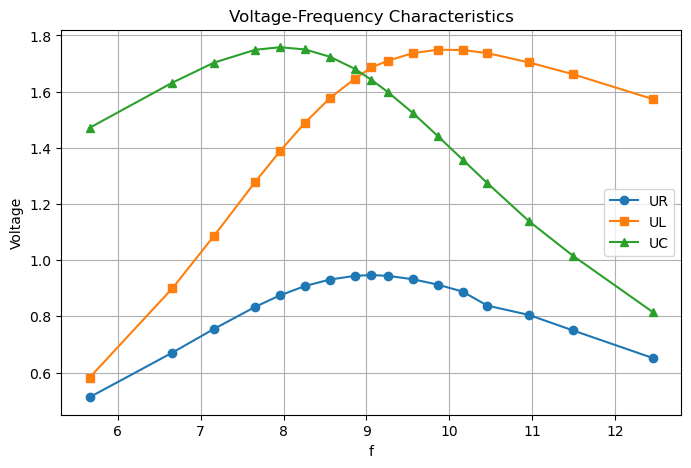

In [4]:
import numpy as np

import matplotlib.pyplot as plt

f = np.array([5.66,6.66,7.16,7.66,7.96,8.26,8.56,8.86,9.06,9.26,9.56,9.86,10.16,10.46,10.96,11.49,12.46])
UR = np.array([0.512,0.671,0.755,0.834,0.875,0.908,0.931,0.944,0.947,0.944,0.932,0.913,0.888,0.838,0.805,0.750,0.651])
UL = np.array([0.582,0.9,1.086,1.279,1.389,1.49,1.577,1.646,1.686,1.71,1.737,1.749,1.748,1.737,1.704,1.662,1.573])
UC = np.array([1.471,1.632,1.703,1.749,1.758,1.750,1.724,1.681,1.642,1.598,1.524,1.442,1.358,1.274,1.139,1.016,0.814])

plt.figure(figsize=(8, 5))
plt.plot(f, UR, marker='o', label='UR')
plt.plot(f, UL, marker='s', label='UL')
plt.plot(f, UC, marker='^', label='UC')

plt.xlabel('f')
plt.ylabel('Voltage')
plt.title('Voltage-Frequency Characteristics')
plt.legend()
plt.grid(True)
plt.show()

Fitted parameters:
A = 0.63
f0 = 9.17
gamma = 2.84
Quality Factor Q = 4.84
f1 = 8.22
f2 = 10.12
f2-f1 = 1.90


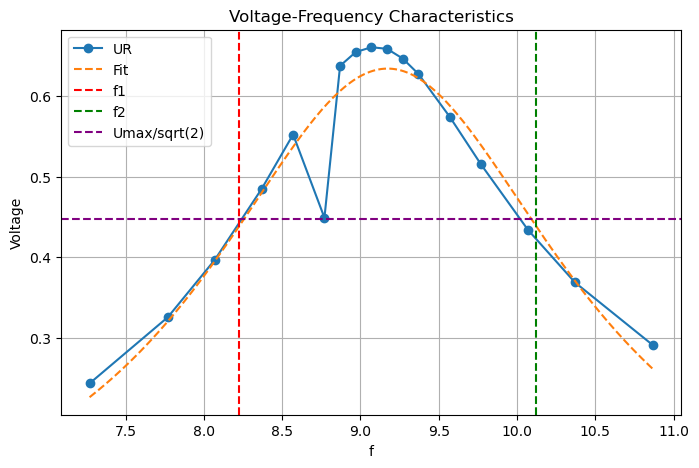

In [4]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

f = np.array([7.27, 7.77, 8.07, 8.37, 8.57, 8.77, 8.87, 8.97, 9.07, 9.17, 9.27, 9.37, 9.57, 9.77, 10.07, 10.37, 10.87])
UR = np.array([0.244, 0.326, 0.397, 0.485, 0.552, 0.449, 0.637, 0.654, 0.66, 0.658, 0.646, 0.627, 0.574, 0.515, 0.434, 0.369, 0.291])


plt.figure(figsize=(8, 5))  
plt.plot(f, UR, marker='o', label='UR')

def lorentzian(f, A, f0, gamma):
    return A / (1 + ((f - f0)/(gamma/2))**2)

# initial guess: peak amplitude, resonance frequency, and width guess
p0 = [max(UR), f[np.argmax(UR)], (f[-1]-f[0])/10]

params, _ = curve_fit(lorentzian, f, UR, p0=p0)
A_fit, f0_fit, gamma_fit = params

# 计算 Umax/sqrt(2)
U_half = A_fit / np.sqrt(2)

# 在拟合曲线上查找对应的 f1, f2
f_fit = np.linspace(min(f), max(f), 1000)
UR_fit = lorentzian(f_fit, *params)
indices = np.where(np.isclose(UR_fit, U_half, rtol=0, atol=0.01))[0]
if len(indices) >= 2:
    f1, f2 = f_fit[indices[0]], f_fit[indices[-1]]
else:
    # 理论值
    f1 = f0_fit - gamma_fit/2
    f2 = f0_fit + gamma_fit/2

Q = f0_fit / (f2 - f1)

print("Fitted parameters:")
print("A = {:.2f}".format(A_fit))
print("f0 = {:.2f}".format(f0_fit))
print("gamma = {:.2f}".format(gamma_fit))
print("Quality Factor Q = {:.2f}".format(Q))
print("f1 = {:.2f}".format(f1))
print("f2 = {:.2f}".format(f2))
print("f2-f1 = {:.2f}".format(f2-f1))
# Plot the fitted curve over the data
f_fit = np.linspace(min(f), max(f), 200)
plt.plot(f_fit, lorentzian(f_fit, *params), '--', label='Fit')
plt.axvline(x=f1, color='red', linestyle='--', label='f1')
plt.axvline(x=f2, color='green', linestyle='--', label='f2')
plt.axhline(y=A_fit/np.sqrt(2), color='purple', linestyle='--', label='Umax/sqrt(2)')
plt.xlabel('f')
plt.ylabel('Voltage')
plt.title('Voltage-Frequency Characteristics')
plt.legend()
plt.grid(True)
plt.show()

Fitted parameters:
A = 0.94
f0 = 9.28
gamma = 8.51
Umax/sqrt(2) = 0.667
f1 = 6.47
f2 = 12.09
f2-f1 = 5.62
Quality Factor Q = 1.65


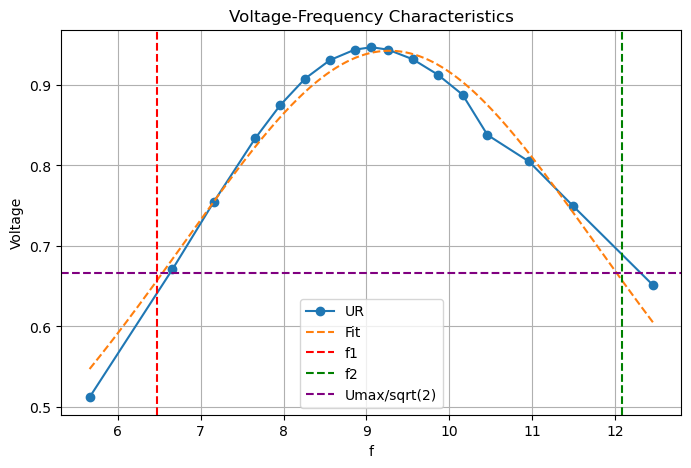

In [2]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

f = np.array([5.66,6.66,7.16,7.66,7.96,8.26,8.56,8.86,9.06,9.26,9.56,9.86,10.16,10.46,10.96,11.49,12.46])
UR = np.array([0.512,0.671,0.755,0.834,0.875,0.908,0.931,0.944,0.947,0.944,0.932,0.913,0.888,0.838,0.805,0.750,0.651])

plt.figure(figsize=(8, 5))  
plt.plot(f, UR, marker='o', label='UR')

def lorentzian(f, A, f0, gamma):
    return A / (1 + ((f - f0)/(gamma/2))**2)

# initial guess: peak amplitude, resonance frequency, and width guess
p0 = [max(UR), f[np.argmax(UR)], (f[-1]-f[0])/10]

params, _ = curve_fit(lorentzian, f, UR, p0=p0)
A_fit, f0_fit, gamma_fit = params

# 计算 Umax/sqrt(2)
U_half = A_fit / np.sqrt(2)

# 在拟合曲线上查找对应的 f1, f2
f_fit = np.linspace(min(f), max(f), 1000)
UR_fit = lorentzian(f_fit, *params)
indices = np.where(np.isclose(UR_fit, U_half, rtol=0, atol=0.01))[0]
if len(indices) >= 2:
    f1, f2 = f_fit[indices[0]], f_fit[indices[-1]]
else:
    # 理论值
    f1 = f0_fit - gamma_fit/2
    f2 = f0_fit + gamma_fit/2

Q = f0_fit / (f2 - f1)

print("Fitted parameters:")
print("A = {:.2f}".format(A_fit))
print("f0 = {:.2f}".format(f0_fit))
print("gamma = {:.2f}".format(gamma_fit))
print("Umax/sqrt(2) = {:.3f}".format(U_half))
print("f1 = {:.2f}".format(f1))
print("f2 = {:.2f}".format(f2))
print("f2-f1 = {:.2f}".format(f2-f1))
print("Quality Factor Q = {:.2f}".format(Q))

plt.plot(f_fit, UR_fit, '--', label='Fit')
plt.axvline(x=f1, color='red', linestyle='--', label='f1')
plt.axvline(x=f2, color='green', linestyle='--', label='f2')
plt.axhline(y=U_half, color='purple', linestyle='--', label='Umax/sqrt(2)')
plt.xlabel('f')
plt.ylabel('Voltage')
plt.title('Voltage-Frequency Characteristics')
plt.legend()
plt.grid(True)
plt.show()